# Fraud detection

## Step 1: import libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Retrieve The Data

In [26]:
credit_card= pd.read_csv("E:\MachineLearningCoursera\datasets\creditcard.csv")

## Step3 : Exploratory Data Analysis 

In [16]:
credit_card.shape

(284807, 31)

In [17]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Class', ylabel='count'>

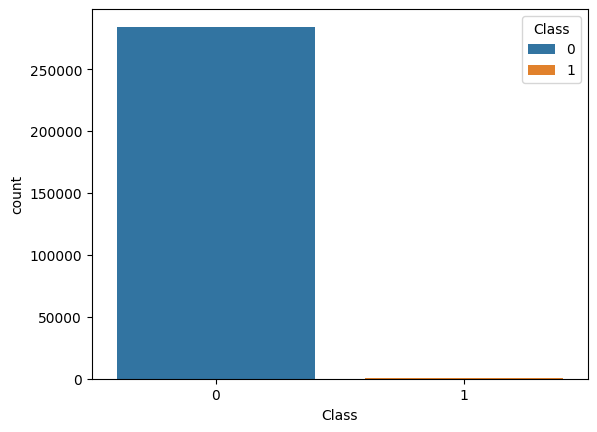

In [19]:
sns.countplot(x="Class",data=credit_card, hue="Class")

## Step 4: Preparing the data into train and test set 

let's start by splitting our data into a training set and test set 

Train and Test 

In [27]:
data = credit_card .drop("Class" , axis=1)
y= credit_card["Class"].values

In [29]:
data.shape

(284807, 30)

In [20]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test, y_train,y_test = train_test_split(data,y,test_size=0.33,random_state=42)

## Step 5: Build a logistic regerssion model for classifictaion

In [31]:
from sklearn.linear_model import LogisticRegression

In [67]:
model =  LogisticRegression(max_iter=100)

## step 6 : train the model 

In [68]:
model.fit(x_train,y_train)

C:\Users\Bakir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
print(model.coef_)
print(model.intercept_)

[[-2.12754278e-05  1.40127051e-01 -1.05702000e-01 -3.10072764e-01
   5.64492925e-01  9.92363466e-02 -9.56903044e-02  9.32850543e-02
  -2.28911944e-01 -3.21285675e-01 -4.53185742e-01 -4.20038394e-01
   1.47052047e-01 -3.83526839e-01 -8.12460734e-01 -4.37892079e-01
  -2.67596476e-01 -1.65844156e-01  2.26713617e-01  6.84080383e-02
   8.69606843e-02  6.08044076e-01  9.42539171e-01 -2.07954777e-01
   8.85529387e-02 -1.02837900e+00  3.44054584e-01 -5.74187251e-01
  -6.98625353e-02 -1.09437329e-03]]
[-6.6622956]


## Step 7:  Evaluation 

In [69]:
y_predict = model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

### accuracy: means the percentage of correct predictions made by the model.

In [70]:
accuracy = accuracy_score(y_test,y_predict)*100
print(f"Accuracy Score: {accuracy:.2f}%")

Accuracy Score: 99.89%


In [53]:
from sklearn.metrics import confusion_matrix

In [71]:
print("confusion :",confusion_matrix(y_test,y_predict))

confusion : [[93792    46]
 [   57    92]]


In [72]:
tn, fp , fn,tp = confusion_matrix(y_test,y_predict).ravel()

In [73]:
print(f" tn= {tn} , fp= {fp} ,fn= {fn},tp= {tp}")

 tn= 93792 , fp= 46 ,fn= 57,tp= 92


In [59]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,y_predict, digits=6))

              precision    recall  f1-score   support

           0   0.999393  0.999510  0.999451     93838
           1   0.666667  0.617450  0.641115       149

    accuracy                       0.998904     93987
   macro avg   0.833030  0.808480  0.820283     93987
weighted avg   0.998865  0.998904  0.998883     93987



In [81]:
from sklearn.metrics import RocCurveDisplay

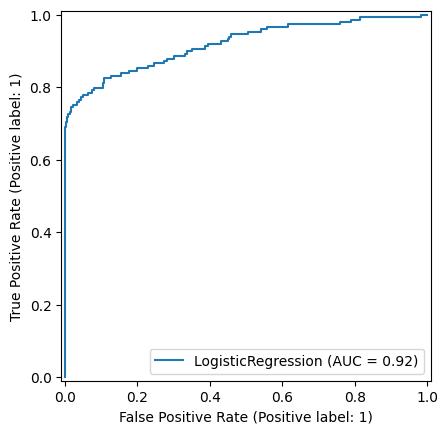

In [84]:
RocCurveDisplay.from_estimator(model, x_test, y_test)

In [86]:
y_test_props = model.predict_proba(x_test)[:,1]

In [87]:
from sklearn.metrics import roc_curve

In [90]:
fpr , tpr , thresholds = roc_curve(y_test,y_test_props)

In [89]:
from numpy import argmax

In [91]:
best = tpr- fpr
ix= argmax(best)

best_threshold = thresholds[ix]
print("best threshold: ",best_threshold )

best threshold:  0.01658272673276957
